In [1]:
import pandas as pd

marketing_campaign_data = 'marketing_campaign.csv'

marketing_campaign_dataframe = pd.read_csv(marketing_campaign_data,
                                           sep='\t',
                                           low_memory=False)

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
marketing_campaign_dataframe = marketing_campaign_dataframe.reset_index()

In [4]:
marketing_campaign_dataframe.head()

,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
marketing_campaign_dataframe = marketing_campaign_dataframe.drop(labels=2234, axis=0)

In [6]:
marketing_campaign_dataframe['Total spent'] = marketing_campaign_dataframe.apply(lambda marketing_campaign_dataframe: 
                           marketing_campaign_dataframe['MntWines'] + marketing_campaign_dataframe['MntFruits'] +
                           marketing_campaign_dataframe['MntMeatProducts'] + marketing_campaign_dataframe['MntFishProducts'] + 
                           marketing_campaign_dataframe['MntSweetProducts'] + marketing_campaign_dataframe['MntGoldProds'], axis=1)

marketing_campaign_dataframe['Total accept cmp'] = marketing_campaign_dataframe.apply(lambda marketing_campaign_dataframe: 
                           marketing_campaign_dataframe['AcceptedCmp1'] + marketing_campaign_dataframe['AcceptedCmp2'] +
                           marketing_campaign_dataframe['AcceptedCmp3'] + marketing_campaign_dataframe['AcceptedCmp4'] + 
                           marketing_campaign_dataframe['AcceptedCmp5'], axis=1)

marketing_campaign_dataframe['Total purchases'] = marketing_campaign_dataframe.apply(lambda marketing_campaign_dataframe: 
                           marketing_campaign_dataframe['NumDealsPurchases'] + marketing_campaign_dataframe['NumWebPurchases'] +
                           marketing_campaign_dataframe['NumCatalogPurchases'] + marketing_campaign_dataframe['NumStorePurchases'], axis=1)

In [7]:
marketing_campaign_dataframe.head()

,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total spent,Total accept cmp,Total purchases
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,0,25
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27,0,6
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776,0,21
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53,0,8
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422,0,19


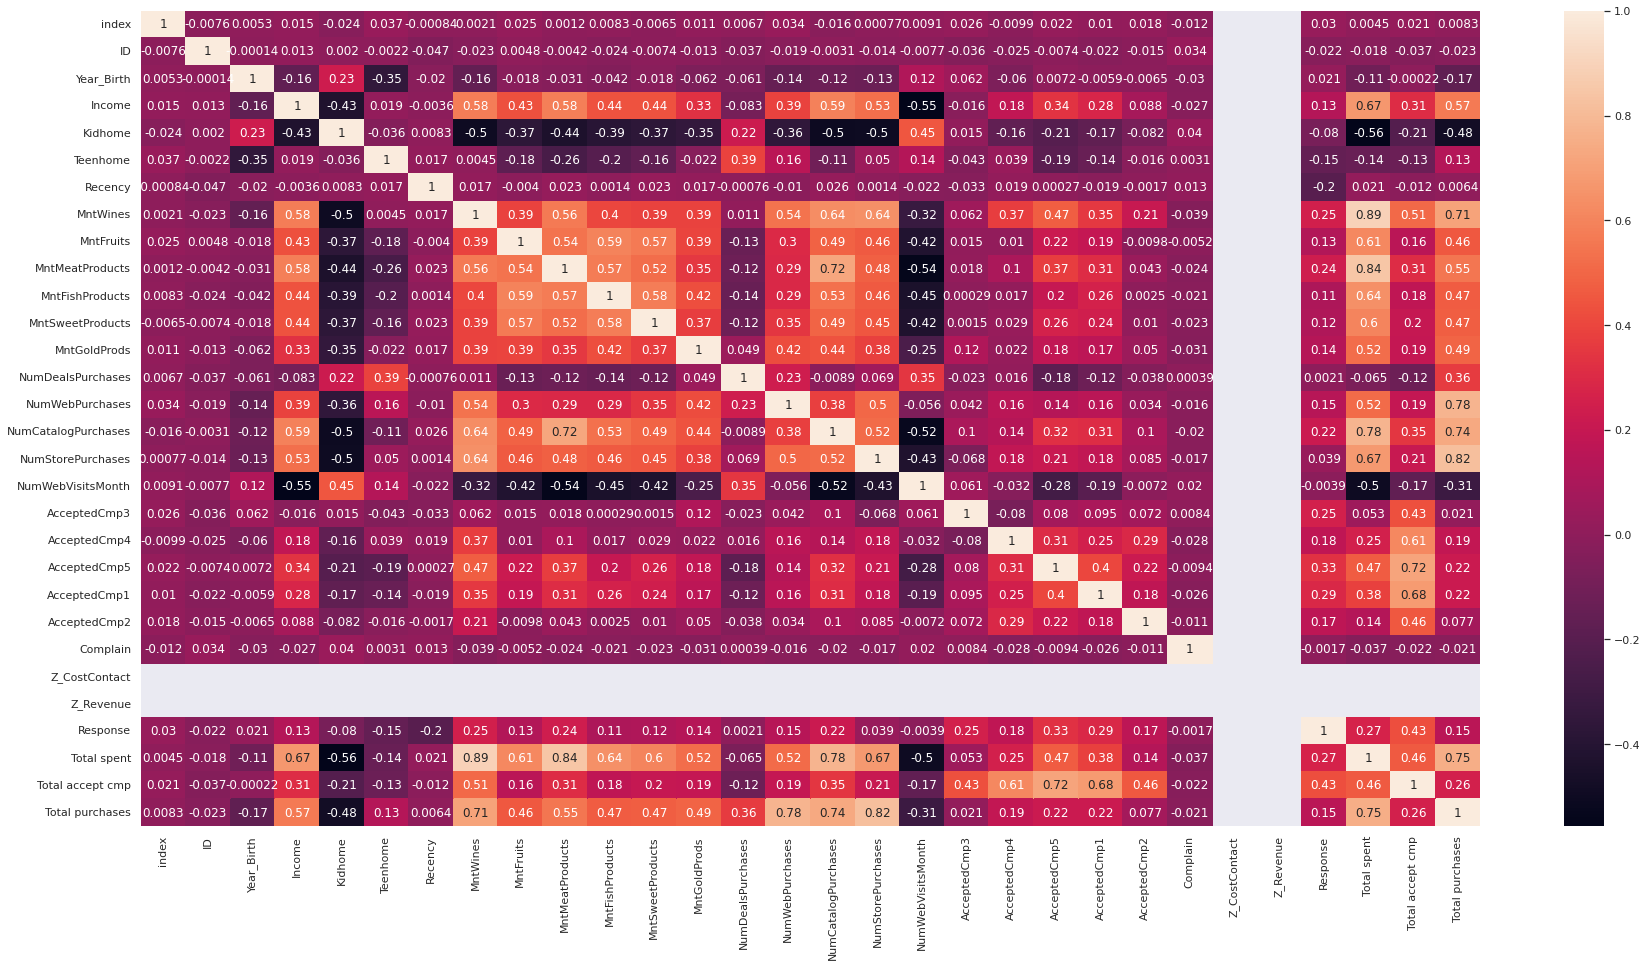

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(30, 15))
sns.heatmap(marketing_campaign_dataframe.corr(), annot=True)

plt.show()

In [9]:
from sklearn.cluster import KMeans

X = marketing_campaign_dataframe[['ID', 'Education', 'Marital_Status', 'Income',
                                  'Kidhome', 'Teenhome', 'Recency', 'Complain', 
                                  'MntWines', 'MntFruits', 'MntMeatProducts',
                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                                  'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
                                  'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
                                  'Complain', 'Response', 'Total spent', 'Total accept cmp',
                                  'Total purchases']].copy()

X.columns = ['Identificação do cliente', 'Escolaridade', 'Estado Civil', 'Renda anual do cliente',
             'Qnt. Crianças em casa', 'Qnt. Adolescentes em casa', 'Recência', 'Reclamações do cliente', 
             'Qnt. gasta em vinho', 'Qnt. gasta em frutas', 'Qnt. gasta em carne', 'Qnt. gasta em peixe', 
             'Qnt. gasta em doce', 'Qnt. gasta produtos em ouro', 'Qnt. compras realizadas com desconto',
             'Qnt. compras realizadas pelo site', 'Qnt. compras realizadas pelo catálogo',
             'Qnt. compras feitas na loja fisica', 'Qnt. visitas ao site mensalmente', 
             'Oferta aceita na terceira campanha', 'Oferta aceita na quarta campanha',
             'Oferta aceita na quinta campanha', 'Oferta aceita na primeira campanha',
             'Oferta aceita na segunda campanha', 'Reclamações', 'Resposta dos clientes à campanha',
             'Total gasto', 'Total aceito durante a campanha', 'Total de compras']

X.head()

,Identificação do cliente,Escolaridade,Estado Civil,Renda anual do cliente,Qnt. Crianças em casa,Qnt. Adolescentes em casa,Recência,Reclamações do cliente,Qnt. gasta em vinho,Qnt. gasta em frutas,Qnt. gasta em carne,Qnt. gasta em peixe,Qnt. gasta em doce,Qnt. gasta produtos em ouro,Qnt. compras realizadas com desconto,Qnt. compras realizadas pelo site,Qnt. compras realizadas pelo catálogo,Qnt. compras feitas na loja fisica,Qnt. visitas ao site mensalmente,Oferta aceita na terceira campanha,Oferta aceita na quarta campanha,Oferta aceita na quinta campanha,Oferta aceita na primeira campanha,Oferta aceita na segunda campanha,Reclamações,Resposta dos clientes à campanha,Total gasto,Total aceito durante a campanha,Total de compras
0,5524,Graduation,Single,58138.0,0,0,58,0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,0,25
1,2174,Graduation,Single,46344.0,1,1,38,0,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,0,6
2,4141,Graduation,Together,71613.0,0,0,26,0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,0,21
3,6182,Graduation,Together,26646.0,1,0,26,0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,0,8
4,5324,PhD,Married,58293.0,1,0,94,0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,0,19


In [10]:
from sklearn.preprocessing import OneHotEncoder

X = pd.get_dummies(X, columns=['Escolaridade', 'Estado Civil'])
X.columns = ['Identificação do cliente', 'Renda anual do cliente', 'Qnt. Crianças em casa', 'Qnt. Adolescentes em casa',
             'Recência', 'Reclamações do cliente', 'Qnt. gasta em vinho', 'Qnt. gasta em frutas', 
             'Qnt. gasta em carne', 'Qnt. gasta em peixe', 'Qnt. gasta em doce', 
             'Qnt. gasta produtos em ouro', 'Qnt. compras realizadas com desconto',
             'Qnt. compras realizadas pelo site', 'Qnt. compras realizadas pelo catálogo',
             'Qnt. compras feitas na loja fisica', 'Qnt. visitas ao site mensalmente',
             'Oferta aceita na terceira campanha', 'Oferta aceita na quarta campanha',
             'Oferta aceita na quinta campanha', 'Oferta aceita na primeira campanha',
             'Oferta aceita na segunda campanha', 'Reclamações', 'Resposta dos clientes à campanha',
             'Total gasto', 'Total aceito durante a campanha', 'Total de compras', 
             'Doutor', 'Ensino médio', 'Ensino superior', 'Mestre', 'PhD', 
             'Estado Civil Absurdo', 'Estado Civil Sozinho', 'Estado Civil Divorciado',
             'Estado Civil Casado', 'Estado Civil Solteiro', 'Estado Civil Juntos',
             'Estado Civil Viúvo', 'Estado Civil Desapegado']

X.head()

,Identificação do cliente,Renda anual do cliente,Qnt. Crianças em casa,Qnt. Adolescentes em casa,Recência,Reclamações do cliente,Qnt. gasta em vinho,Qnt. gasta em frutas,Qnt. gasta em carne,Qnt. gasta em peixe,Qnt. gasta em doce,Qnt. gasta produtos em ouro,Qnt. compras realizadas com desconto,Qnt. compras realizadas pelo site,Qnt. compras realizadas pelo catálogo,Qnt. compras feitas na loja fisica,Qnt. visitas ao site mensalmente,Oferta aceita na terceira campanha,Oferta aceita na quarta campanha,Oferta aceita na quinta campanha,Oferta aceita na primeira campanha,Oferta aceita na segunda campanha,Reclamações,Resposta dos clientes à campanha,Total gasto,Total aceito durante a campanha,Total de compras,Doutor,Ensino médio,Ensino superior,Mestre,PhD,Estado Civil Absurdo,Estado Civil Sozinho,Estado Civil Divorciado,Estado Civil Casado,Estado Civil Solteiro,Estado Civil Juntos,Estado Civil Viúvo,Estado Civil Desapegado
0,5524,58138.0,0,0,58,0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,0,25,0,0,1,0,0,0,0,0,0,1,0,0,0
1,2174,46344.0,1,1,38,0,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,0,6,0,0,1,0,0,0,0,0,0,1,0,0,0
2,4141,71613.0,0,0,26,0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,0,21,0,0,1,0,0,0,0,0,0,0,1,0,0
3,6182,26646.0,1,0,26,0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,0,8,0,0,1,0,0,0,0,0,0,0,1,0,0
4,5324,58293.0,1,0,94,0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,0,19,0,0,0,0,1,0,0,0,1,0,0,0,0


In [11]:
for content in X:
    X.dropna(subset=[content], inplace=True)

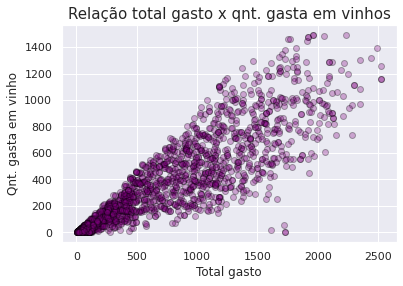

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X['Total gasto'], X['Qnt. gasta em vinho'], alpha=0.3, color='purple',
            edgecolors='black')

plt.title('Relação total gasto x qnt. gasta em vinhos', fontsize=15)
plt.xlabel('Total gasto', fontsize=12)
plt.ylabel('Qnt. gasta em vinho', fontsize=12)

plt.show()

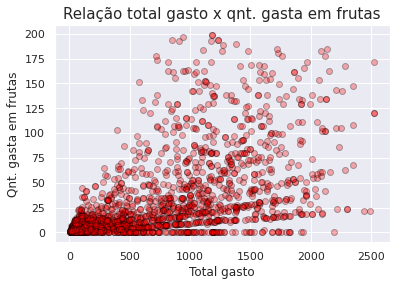

In [13]:
plt.scatter(X['Total gasto'], X['Qnt. gasta em frutas'], alpha=0.3, color='red',
            edgecolors='black')

plt.title('Relação total gasto x qnt. gasta em frutas', fontsize=15)
plt.xlabel('Total gasto', fontsize=12)
plt.ylabel('Qnt. gasta em frutas', fontsize=12)

plt.show()

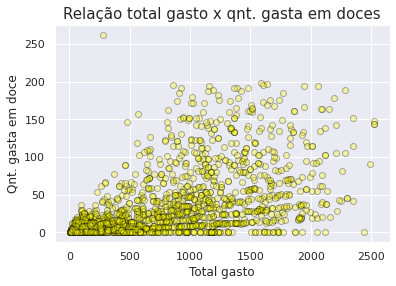

In [14]:
plt.scatter(X['Total gasto'], X['Qnt. gasta em doce'], alpha=0.3, color='yellow',
            edgecolors='black')

plt.title('Relação total gasto x qnt. gasta em doces', fontsize=15)
plt.xlabel('Total gasto', fontsize=12)
plt.ylabel('Qnt. gasta em doce', fontsize=12)

plt.show()

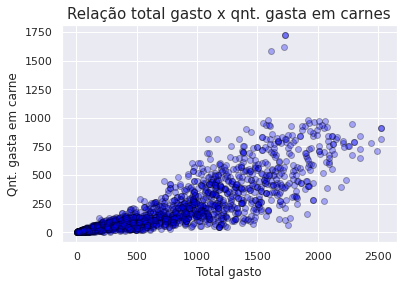

In [15]:
plt.scatter(X['Total gasto'], X['Qnt. gasta em carne'], alpha=0.3, color='blue',
            edgecolors='black')

plt.title('Relação total gasto x qnt. gasta em carnes', fontsize=15)
plt.xlabel('Total gasto', fontsize=12)
plt.ylabel('Qnt. gasta em carne', fontsize=12)

plt.show()

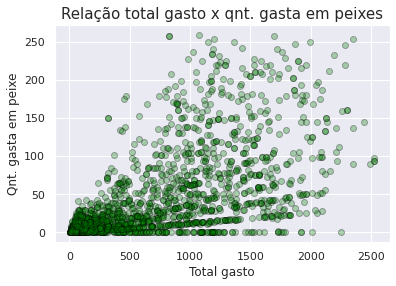

In [16]:
plt.scatter(X['Total gasto'], X['Qnt. gasta em peixe'], alpha=0.3, color='green',
            edgecolors='black')

plt.title('Relação total gasto x qnt. gasta em peixes', fontsize=15)
plt.xlabel('Total gasto', fontsize=12)
plt.ylabel('Qnt. gasta em peixe', fontsize=12)

plt.show()

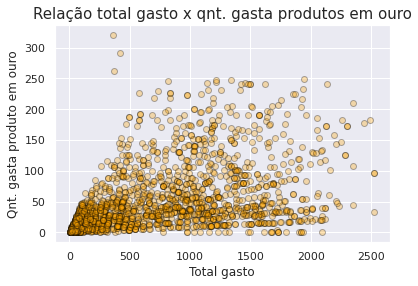

In [17]:
plt.scatter(X['Total gasto'], X['Qnt. gasta produtos em ouro'], alpha=0.3, color='orange',
            edgecolors='black')

plt.title('Relação total gasto x qnt. gasta produtos em ouro', fontsize=15)
plt.xlabel('Total gasto', fontsize=12)
plt.ylabel('Qnt. gasta produto em ouro', fontsize=12)

plt.show()

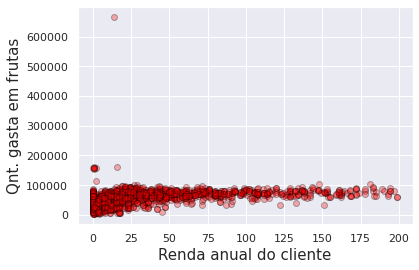

In [18]:
plt.scatter(X['Qnt. gasta em frutas'], X['Renda anual do cliente'], alpha=0.3, 
            color='red', edgecolors='black')

plt.xlabel('Renda anual do cliente', fontsize=15)
plt.ylabel('Qnt. gasta em frutas', fontsize=15)
plt.show()

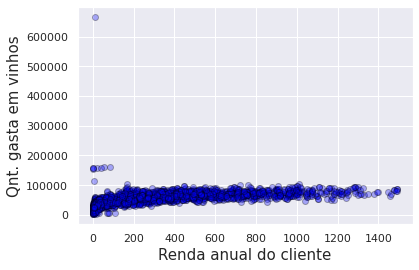

In [19]:
plt.scatter(X['Qnt. gasta em vinho'], X['Renda anual do cliente'], alpha=0.3, 
            color='blue', edgecolors='black')

plt.xlabel('Renda anual do cliente', fontsize=15)
plt.ylabel('Qnt. gasta em vinhos', fontsize=15)
plt.show()

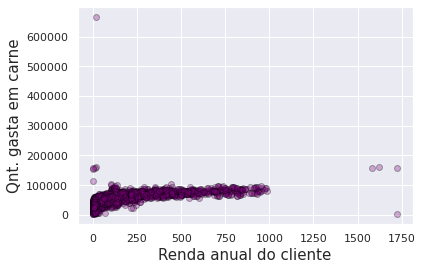

In [20]:
plt.scatter(X['Qnt. gasta em carne'], X['Renda anual do cliente'], alpha=0.3, 
            color='purple', edgecolors='black')

plt.xlabel('Renda anual do cliente', fontsize=15)
plt.ylabel('Qnt. gasta em carne', fontsize=15)
plt.show()

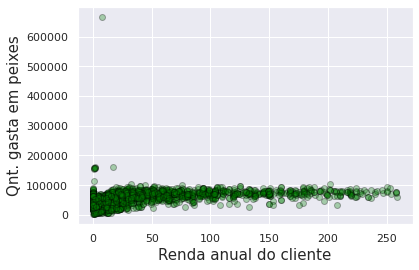

In [21]:
plt.scatter(X['Qnt. gasta em peixe'], X['Renda anual do cliente'], alpha=0.3, 
            color='green', edgecolors='black')

plt.xlabel('Renda anual do cliente', fontsize=15)
plt.ylabel('Qnt. gasta em peixes', fontsize=15)
plt.show()

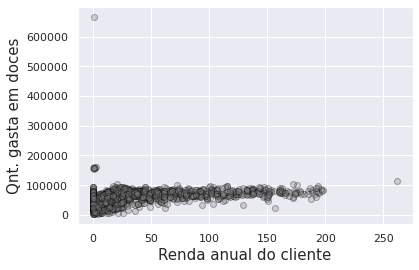

In [22]:
plt.scatter(X['Qnt. gasta em doce'], X['Renda anual do cliente'], alpha=0.3, 
            color='gray', edgecolors='black')

plt.xlabel('Renda anual do cliente', fontsize=15)
plt.ylabel('Qnt. gasta em doces', fontsize=15)
plt.show()

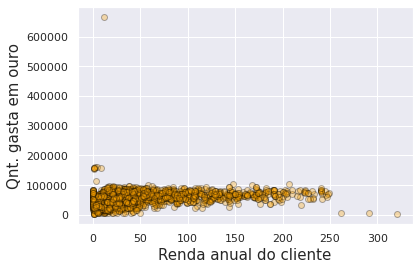

In [23]:
plt.scatter(X['Qnt. gasta produtos em ouro'], X['Renda anual do cliente'], alpha=0.3, 
            color='orange', edgecolors='black')

plt.xlabel('Renda anual do cliente', fontsize=15)
plt.ylabel('Qnt. gasta em ouro', fontsize=15)
plt.show()

In [24]:
linear_analysis_axisX = X[['Qnt. gasta em vinho', 'Qnt. gasta em carne', 'Qnt. gasta em doce',
                           'Qnt. gasta em peixe', 'Qnt. gasta em frutas', 'Qnt. gasta produtos em ouro']]

linear_analysis_axisY = X[['Renda anual do cliente']]

In [25]:
from sklearn.model_selection import train_test_split

linear_Xtrain, linear_Xtest, linear_ytrain, linear_ytest = train_test_split(
    linear_analysis_axisX, linear_analysis_axisY, test_size=0.25)

In [26]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(linear_Xtrain, linear_ytrain)

In [27]:
linear_pred = linear_model.predict(linear_Xtest)

In [28]:
from sklearn.metrics import r2_score

print('coefficient of determination: ', r2_score(linear_ytest, linear_pred))

coefficient of determination:  0.65258427187427


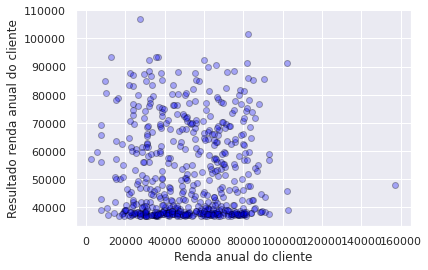

In [29]:
plt.scatter(linear_analysis_axisY.iloc[0:554, :], linear_pred, alpha=0.3, color='blue',
            edgecolors='black')

plt.xlabel('Renda anual do cliente', fontsize=12)
plt.ylabel('Resultado renda anual do cliente', fontsize=12)

plt.show()

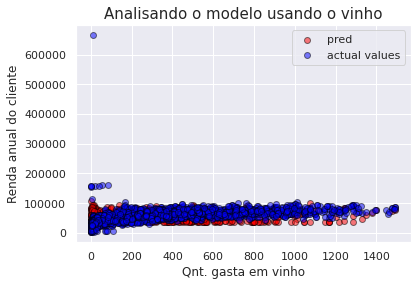

In [30]:
plt.scatter(linear_analysis_axisX.iloc[0:554, [0]], linear_pred, alpha=0.5,
            color='red', edgecolors='black', label='pred')

plt.scatter(X['Qnt. gasta em vinho'], X['Renda anual do cliente'], alpha=0.5,
            color='blue', edgecolors='black', label='actual values')

plt.title('Analisando o modelo usando o vinho', fontsize=15)
plt.xlabel('Qnt. gasta em vinho', fontsize=12)
plt.ylabel('Renda anual do cliente', fontsize=12)

plt.legend()
plt.show()

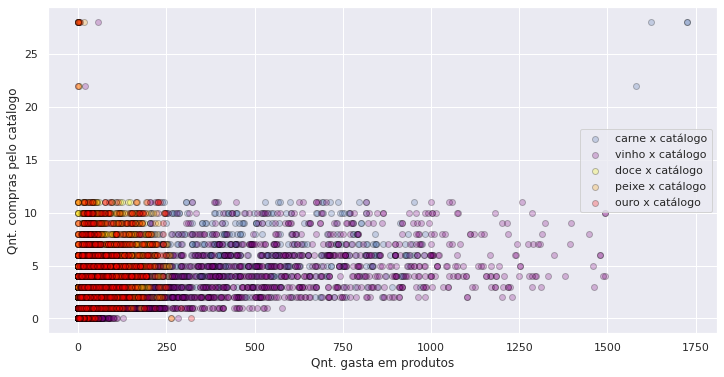

In [31]:
plt.figure(figsize=(12, 6))

plt.scatter(X['Qnt. gasta em carne'], X['Qnt. compras realizadas pelo catálogo'],
            edgecolors='black', alpha=0.25, label='carne x catálogo')

plt.scatter(X['Qnt. gasta em vinho'], X['Qnt. compras realizadas pelo catálogo'],
            color='purple', edgecolors='black', alpha=0.25, label='vinho x catálogo')

plt.scatter(X['Qnt. gasta em doce'], X['Qnt. compras realizadas pelo catálogo'],
            color='yellow', edgecolors='black', alpha=0.25, label='doce x catálogo')

plt.scatter(X['Qnt. gasta em peixe'], X['Qnt. compras realizadas pelo catálogo'],
            color='orange', edgecolors='black', alpha=0.25, label='peixe x catálogo')

plt.scatter(X['Qnt. gasta produtos em ouro'], X['Qnt. compras realizadas pelo catálogo'],
            color='red', edgecolors='black', alpha=0.25, label='ouro x catálogo')

plt.xlabel('Qnt. gasta em produtos', fontsize=12)
plt.ylabel('Qnt. compras pelo catálogo', fontsize=12)

plt.legend()
plt.show()

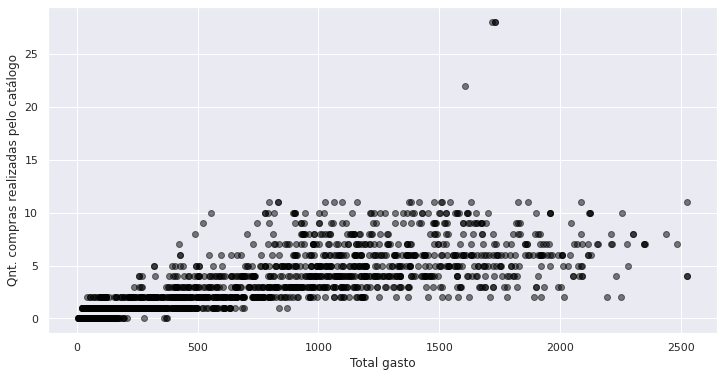

In [32]:
plt.figure(figsize=(12, 6))
plt.scatter(X['Total gasto'], X['Qnt. compras realizadas pelo catálogo'],
            color='black', edgecolors='black', alpha=0.5)

plt.xlabel('Total gasto', fontsize=12)
plt.ylabel('Qnt. compras realizadas pelo catálogo', fontsize=12)

plt.show()

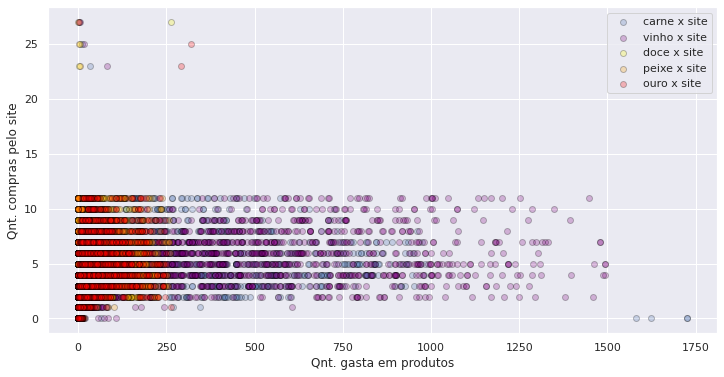

In [33]:
plt.figure(figsize=(12, 6))

plt.scatter(X['Qnt. gasta em carne'], X['Qnt. compras realizadas pelo site'],
            edgecolors='black', alpha=0.25, label='carne x site')

plt.scatter(X['Qnt. gasta em vinho'], X['Qnt. compras realizadas pelo site'],
            color='purple', edgecolors='black', alpha=0.25, label='vinho x site')

plt.scatter(X['Qnt. gasta em doce'], X['Qnt. compras realizadas pelo site'],
            color='yellow', edgecolors='black', alpha=0.25, label='doce x site')

plt.scatter(X['Qnt. gasta em peixe'], X['Qnt. compras realizadas pelo site'],
            color='orange', edgecolors='black', alpha=0.25, label='peixe x site')

plt.scatter(X['Qnt. gasta produtos em ouro'], X['Qnt. compras realizadas pelo site'],
            color='red', edgecolors='black', alpha=0.25, label='ouro x site')

plt.xlabel('Qnt. gasta em produtos', fontsize=12)
plt.ylabel('Qnt. compras pelo site', fontsize=12)

plt.legend()
plt.show()

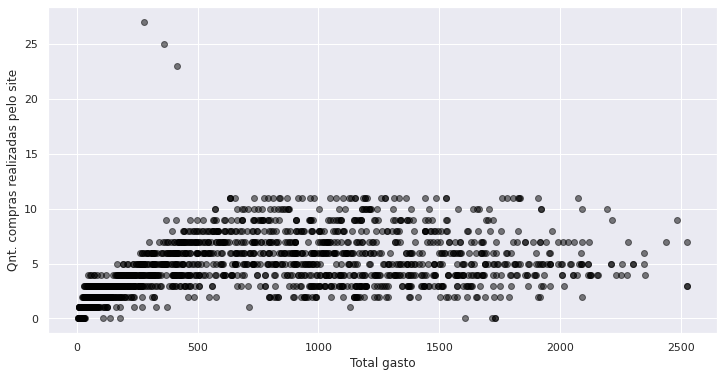

In [34]:
plt.figure(figsize=(12, 6))
plt.scatter(X['Total gasto'], X['Qnt. compras realizadas pelo site'],
            color='black', edgecolors='black', alpha=0.5)

plt.xlabel('Total gasto', fontsize=12)
plt.ylabel('Qnt. compras realizadas pelo site', fontsize=12)

plt.show()

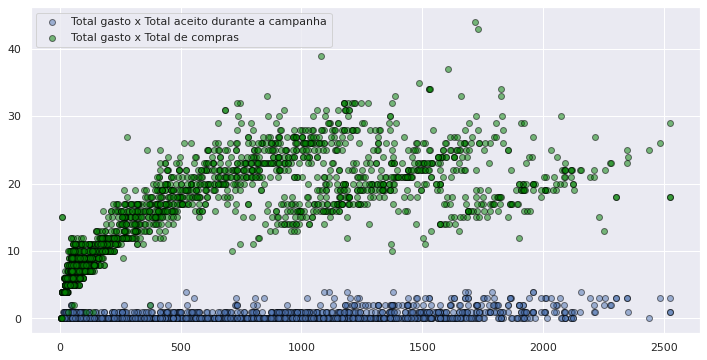

In [35]:
plt.figure(figsize=(12, 6))

plt.scatter(X['Total gasto'], X['Total aceito durante a campanha'], alpha=0.5,
            edgecolors='black',  label='Total gasto x Total aceito durante a campanha')

plt.scatter(X['Total gasto'], X['Total de compras'], alpha=0.5, color='green',
            edgecolors='black',  label='Total gasto x Total de compras')

plt.legend()
plt.show()

In [36]:
deep_learning_X = X[['Reclamações', 'Total gasto', 'Total aceito durante a campanha',
                     'Total de compras']]

deep_learning_y = X[['Resposta dos clientes à campanha']]

In [37]:
from sklearn.model_selection import train_test_split

deep_learning_Xtrain, deep_learning_Xtest, deep_learning_ytrain, deep_learning_ytest = train_test_split(
    deep_learning_X, deep_learning_y, test_size=0.25, shuffle=True
)

In [38]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

deep_learning_Xtrain = sc.fit_transform(deep_learning_Xtrain)
deep_learning_Xtest = sc.transform(deep_learning_Xtest)

In [39]:
import tensorflow as tf

ann = tf.keras.models.Sequential()

In [40]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [41]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [42]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [43]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
ann.fit(deep_learning_Xtrain, deep_learning_ytrain, batch_size=12, epochs=100)

Epoch 1/100
139/139 [==============================] - 2s 3ms/step - loss: 0.5014 - accuracy: 0.8507
Epoch 2/100
139/139 [==============================] - 0s 3ms/step - loss: 0.4227 - accuracy: 0.8507
Epoch 3/100
139/139 [==============================] - 0s 3ms/step - loss: 0.3861 - accuracy: 0.8507
Epoch 4/100
139/139 [==============================] - 0s 3ms/step - loss: 0.3668 - accuracy: 0.8645
Epoch 5/100
139/139 [==============================] - 0s 4ms/step - loss: 0.3572 - accuracy: 0.8663
Epoch 6/100
139/139 [==============================] - 1s 4ms/step - loss: 0.3535 - accuracy: 0.8669
Epoch 7/100
139/139 [==============================] - 0s 4ms/step - loss: 0.3516 - accuracy: 0.8663
Epoch 8/100
139/139 [==============================] - 0s 3ms/step - loss: 0.3508 - accuracy: 0.8651
Epoch 9/100
139/139 [==============================] - 0s 3ms/step - loss: 0.3504 - accuracy: 0.8657
Epoch 10/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3497 - accura

In [45]:
print(ann.predict(sc.transform([[2, 2500, 1, 5]])) > 0.5)

[[ True]]


In [46]:
import numpy as np

pred = ann.predict(deep_learning_Xtest)
pred = (pred > 0.5)

In [47]:
y_test = deep_learning_ytest.iloc[:, :].values

print(np.concatenate((pred.reshape(len(pred), 1), 
                      y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, pred)

print(cm)
print('accuracy score for confusion matrix: ', accuracy_score(y_test, pred))

[[461   8]
 [ 69  16]]
accuracy score for confusion matrix:  0.8610108303249098


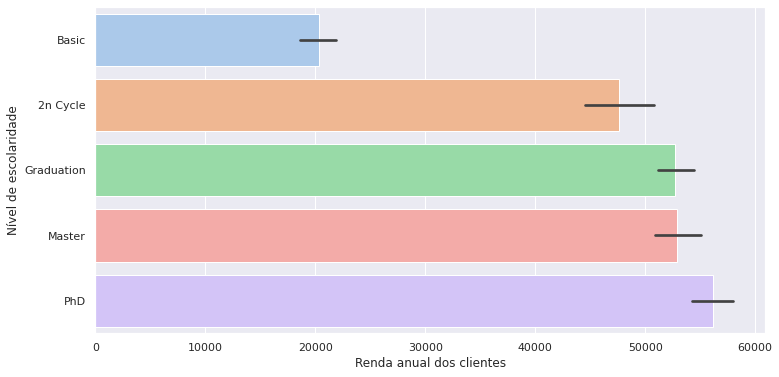

In [49]:
display_elements = marketing_campaign_dataframe[['Income', 'Education']]
display_elements.columns = ['Renda anual dos clientes', 'Nível de escolaridade']

import seaborn as sns

plt.figure(figsize=(12, 6))

sns.set()
sns.barplot(x=display_elements['Renda anual dos clientes'],
            y=display_elements['Nível de escolaridade'],
            palette='pastel', order=['Basic', '2n Cycle', 'Graduation', 'Master',
                                     'PhD'])

plt.show()

In [50]:
deep_learning_X_wDegree = X[['Reclamações', 'Total gasto', 'Total aceito durante a campanha',
                     'Total de compras', 'Doutor', 'Ensino médio', 'Ensino superior', 
                     'Mestre', 'PhD']]

deep_learning_y_wDegree = X[['Resposta dos clientes à campanha']]

In [51]:
from sklearn.model_selection import train_test_split

deep_learning_Xtrain, deep_learning_Xtest, deep_learning_ytrain, deep_learning_ytest = train_test_split(
    deep_learning_X_wDegree, deep_learning_y_wDegree, test_size=0.25, shuffle=True
)

In [52]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

deep_learning_Xtrain = sc.fit_transform(deep_learning_Xtrain)
deep_learning_Xtest = sc.transform(deep_learning_Xtest)

In [53]:
import tensorflow as tf

ann = tf.keras.models.Sequential()

In [54]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [55]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [56]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [57]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
ann.fit(deep_learning_Xtrain, deep_learning_ytrain, batch_size=12, epochs=100)

Epoch 1/100
139/139 [==============================] - 1s 2ms/step - loss: 0.5526 - accuracy: 0.8188
Epoch 2/100
139/139 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.8477
Epoch 3/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3951 - accuracy: 0.8477
Epoch 4/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3766 - accuracy: 0.8477
Epoch 5/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3687 - accuracy: 0.8501
Epoch 6/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3647 - accuracy: 0.8555
Epoch 7/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3618 - accuracy: 0.8633
Epoch 8/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3588 - accuracy: 0.8627
Epoch 9/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3560 - accuracy: 0.8621
Epoch 10/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3547 - accura

In [59]:
print(ann.predict(sc.transform([[2, 2500, 1, 5, 0, 1, 0, 0, 0]])) > 0.5)

[[False]]


In [60]:
y_test = deep_learning_ytest.iloc[:, :].values

print(np.concatenate((pred.reshape(len(pred), 1), 
                      y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [61]:
import numpy as np

pred = ann.predict(deep_learning_Xtest)
pred = (pred > 0.5)

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, pred)

print(cm)
print('accuracy score for confusion matrix: ', accuracy_score(y_test, pred))

[[460  14]
 [ 61  19]]
accuracy score for confusion matrix:  0.8646209386281588


In [63]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score

wcss = []

for number_of_clusters in range(2, 12):
    kmeans = KMeans(n_clusters=number_of_clusters, random_state=0)
    kmeans.fit(X)
    kmeans_labels = kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)
    silhouette = silhouette_score(X, kmeans_labels)
    print('For numer_of_clusters = ', number_of_clusters,
          'Silhouette score is = ', silhouette)
    
    colors = cm.nipy_spectral(kmeans_labels / number_of_clusters)

For numer_of_clusters =  2 Silhouette score is =  0.5721124451379548
For numer_of_clusters =  3 Silhouette score is =  0.5763125517857092
For numer_of_clusters =  4 Silhouette score is =  0.48986024554348195
For numer_of_clusters =  5 Silhouette score is =  0.45799329277945133
For numer_of_clusters =  6 Silhouette score is =  0.46252628579409116
For numer_of_clusters =  7 Silhouette score is =  0.43904350907119777
For numer_of_clusters =  8 Silhouette score is =  0.40238997011994615
For numer_of_clusters =  9 Silhouette score is =  0.3786460666499623
For numer_of_clusters =  10 Silhouette score is =  0.37226353063113143
For numer_of_clusters =  11 Silhouette score is =  0.35059112791148933


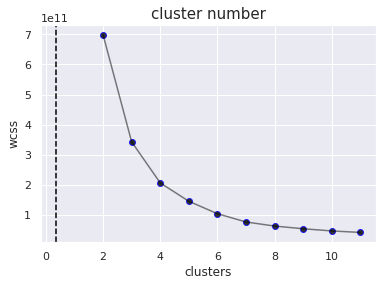

In [64]:
plt.plot(range(2, 12), wcss[0:12], alpha=0.5, color='black')
plt.scatter(range(2, 12), wcss[0:12], alpha=0.8, color='black', edgecolors='blue')
plt.axvline(silhouette, color='black', linestyle='--')
plt.title('cluster number', fontsize=15)
plt.xlabel('clusters', fontsize=12)
plt.ylabel('wcss', fontsize=12)
plt.show()

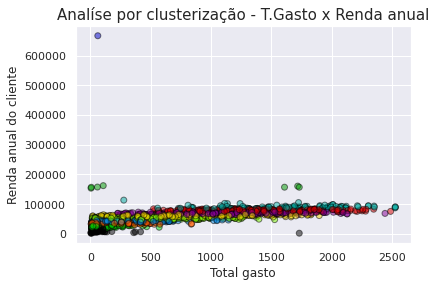

In [65]:
plt.scatter(X['Total gasto'], X['Renda anual do cliente'], 
            c=colors, alpha=0.5, edgecolors='black')

plt.title('Analíse por clusterização - T.Gasto x Renda anual', fontsize=15)
plt.xlabel('Total gasto', fontsize=12)
plt.ylabel('Renda anual do cliente', fontsize=12)

plt.show()

In [87]:
"""Using marketing_campaign_dataframe for X and y because I'm getting a weird error with X in this cell"""

X = marketing_campaign_dataframe[['Complain', 'Total spent', 'Total accept cmp',
                                  'Total purchases']]

y = marketing_campaign_dataframe[['Response']]

In [67]:
for content in X:
    X.dropna(subset=[content], inplace=True)

In [68]:
for content in y:
    y.dropna(subset=[content], inplace=True)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True,
                                                    random_state=100)

In [70]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree').fit(X_train, y_train)

In [72]:
knn_pred = knn.predict(X_test)

In [73]:
knn_acc = accuracy_score(y_test, knn_pred)
print('accuracy score for knn: ', knn_acc)

accuracy score for knn:  0.8267857142857142


In [74]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X=X_train, y=y_train, cv=10, n_jobs=1)
print('cross validation accuracy score: ', scores)

cross validation accuracy score:  [0.80357143 0.79464286 0.80357143 0.80357143 0.82142857 0.83035714
 0.84821429 0.83035714 0.83035714 0.84684685]


In [75]:
print(knn.predict(sc.transform([[2, 2500, 1, 5]])) > 0.5)

[False]


In [76]:
from sklearn import svm

svm = svm.SVC().fit(X_train, y_train)

In [77]:
svm_pred = svm.predict(X_test)

In [78]:
svm_acc = accuracy_score(y_test, svm_pred)
print('accuracy score for svm: ', svm_acc)

accuracy score for svm:  0.8776785714285714


In [79]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm, X=X_train, y=y_train, cv=10, n_jobs=1)
print('cross validation accuracy score: ', scores)

cross validation accuracy score:  [0.83035714 0.86607143 0.83928571 0.84821429 0.83928571 0.82142857
 0.88392857 0.84821429 0.83928571 0.86486486]


In [80]:
print(svm.predict(sc.transform([[2, 2500, 1, 5]])) > 0.5)

[False]


In [81]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=10, learning_rate=0.1).fit(X_train, y_train)

In [82]:
xgb_pred = xgb_model.predict(X_test)

In [83]:
xgb_acc = accuracy_score(y_test, xgb_pred)
print('accuracy score for xgb: ', xgb_acc)

accuracy score for xgb:  0.8803571428571428


In [84]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_model, X=X_train, y=y_train, cv=10, n_jobs=1)
print('cross validation accuracy score: ', scores)

cross validation accuracy score:  [0.83035714 0.86607143 0.84821429 0.82142857 0.83035714 0.8125
 0.88392857 0.84821429 0.84821429 0.85585586]


In [85]:
print(xgb_model.predict(sc.transform([[2, 2500, 1, 5]])) > 0.5)

[False]
